#  1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas_datareader.data import DataReader
import warnings
from datetime import datetime
import yfinance as yf

warnings.filterwarnings("ignore")

We start of by utilizing the historic data spanning the past year , which can be obtained by utilizing the [Yahoo Finance API](https://pypi.org/project/yfinance/)

In [8]:
end_date = datetime.now().date()
start_date = end_date.replace(year=end_date.year - 1)


Small-cap stocks, while potentially offering higher returns, carry greater risk and volatility, and their historical data may be more limited, making them less ideal for some types of financial analysis or predictive modeling. Hence , we use **blue-chip stocks**


In [9]:
# Define the list of Indian stock symbols (NSE or BSE)
stock_symbols = ["HDFCBANK.NS", "INFY.NS", "RELIANCE.NS", "TATASTEEL.NS"]

# Define the corresponding company names
company_names = ["HDFC Bank", "Infosys", "Reliance Industries", "Tata Steel"]

stock_data = pd.DataFrame()

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.download(symbol, start=start_date, end=end_date)
    stock_data[symbol] = stock["Adj Close"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Market data obtained from the past year

In [10]:
print(stock_data.head())

            HDFCBANK.NS      INFY.NS  RELIANCE.NS  TATASTEEL.NS
Date                                                           
2023-09-07  1589.149414  1439.352417  2423.773682    127.579552
2023-09-08  1601.530396  1442.690186  2439.918945    126.942398
2023-09-11  1609.817261  1449.414795  2466.229736    128.559799
2023-09-12  1614.848511  1473.613403  2430.600586    126.452271
2023-09-13  1621.754272  1470.913818  2442.759277    126.991417


In [11]:
stock_dfs = []

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    stock_data = stock.history(start=start_date, end=end_date)
    stock_data["Company"] = symbol
    stock_dfs.append(stock_data)

data = pd.concat(stock_dfs, axis=0)

print(data.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2024-09-02 00:00:00+05:30  153.899994  153.899994  152.139999  152.880005   
2024-09-03 00:00:00+05:30  152.839996  153.449997  152.009995  152.149994   
2024-09-04 00:00:00+05:30  149.500000  152.179993  149.160004  151.179993   
2024-09-05 00:00:00+05:30  151.000000  152.789993  151.000000  151.720001   
2024-09-06 00:00:00+05:30  151.940002  152.899994  149.649994  151.220001   

                             Volume  Dividends  Stock Splits       Company  
Date                                                                        
2024-09-02 00:00:00+05:30  19200143        0.0           0.0  TATASTEEL.NS  
2024-09-03 00:00:00+05:30  19780066        0.0           0.0  TATASTEEL.NS  
2024-09-04 00:00:00+05:30  39613696        0.0           0.0  TATASTEEL.NS  
2024-09-05 00:00:00+05:30  28347324        0.0           0.0  TATASTEEL.NS 

In [12]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,975.000000,975.000000,975.000000,975.000000,9.750000e+02,975.000000,975.0
mean,1497.547028,1510.245424,1484.967016,1497.578203,1.967333e+07,0.060615,0.0
std,936.982044,944.960030,929.184155,937.014588,2.120523e+07,0.949239,0.0
min,112.336672,116.208665,112.336672,114.297173,1.927405e+06,0.000000,0.0
25%,763.812899,773.204303,761.127397,763.250397,5.580902e+06,0.000000,0.0
50%,1514.514304,1524.186595,1500.016633,1513.384155,1.155464e+07,0.000000,0.0
75%,2099.711603,2113.056100,2077.794910,2091.734375,2.733541e+07,0.000000,0.0
max,3198.045850,3206.716576,3160.274143,3190.969971,2.226710e+08,19.500000,0.0


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

# 2. Exploratory Data Analysis

### 2.1 Overview of all 4 companies

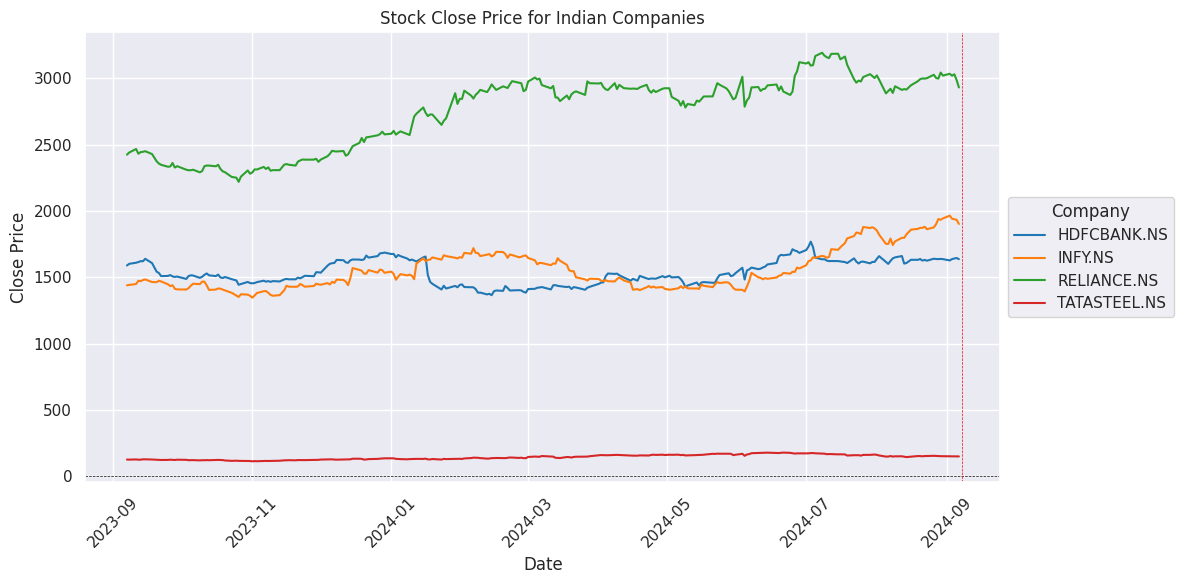

In [13]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.lineplot(
    x=data.index,
    y="Close",
    data=data,
    hue="Company",
    palette="tab10"
)

ax.set(
    title="Stock Close Price for Indian Companies",
    xlabel="Date",
    ylabel="Close Price"
)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Company')

plt.xticks(rotation=45)

ax.grid(True)

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

plt.axvline(end_date, color='red', linestyle='--', linewidth=0.5, label='Today')

plt.tight_layout()
plt.show()

### 2.2 Adjusted Close Price Each Stock

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')


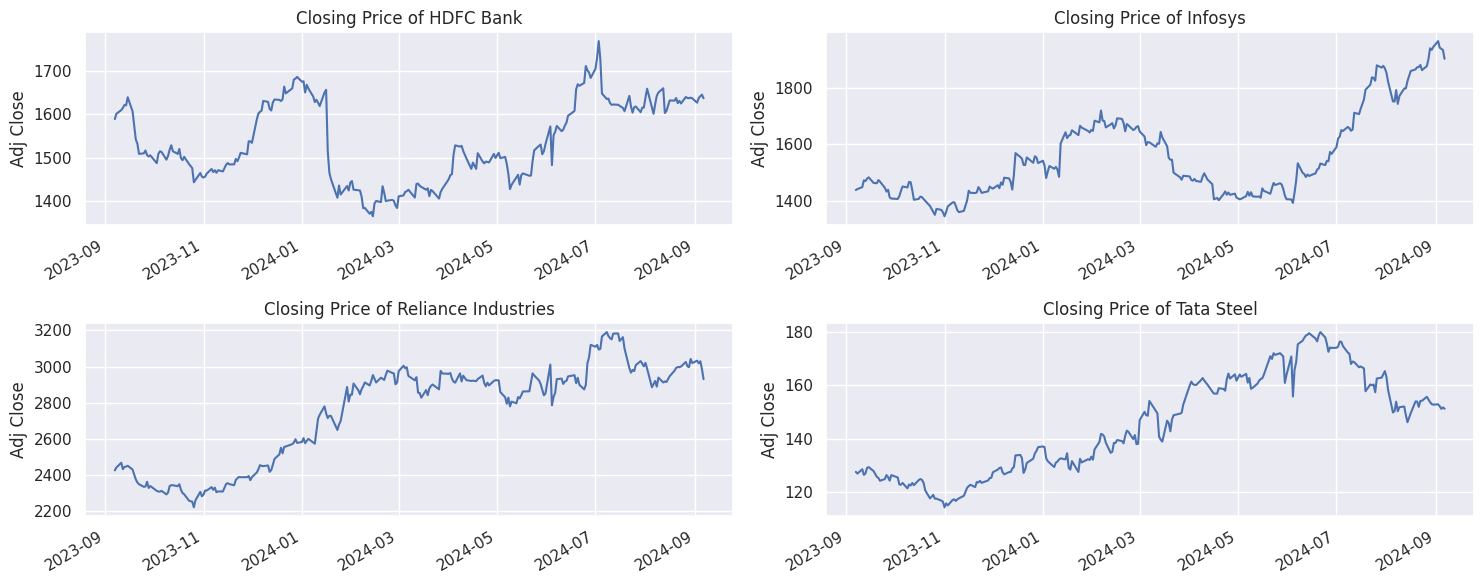

In [14]:
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):

    print(stock_df.columns)

    column_name = "Close"

    stock_df[column_name].plot(ax=ax)
    ax.set_ylabel("Adj Close")
    ax.set_xlabel(None)
    ax.set_title(f"Closing Price of {company_name}")

for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### 2.3 Total Volume of Stock traded Each Day

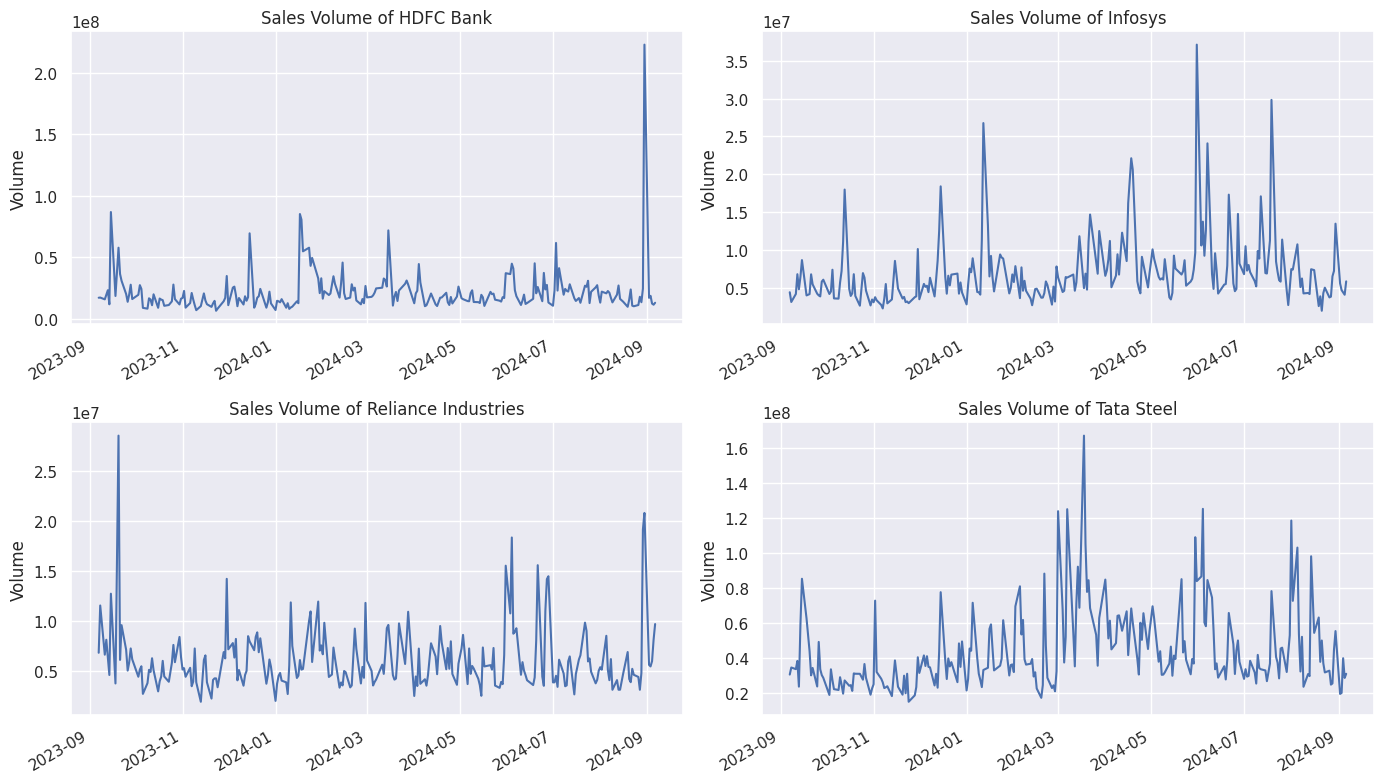

In [15]:
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    stock_df["Volume"].plot(ax=ax)
    ax.set_ylabel("Volume")
    ax.set_xlabel(None)
    ax.set_title(f"Sales Volume of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### 2.4 Moving Average of Each Stock

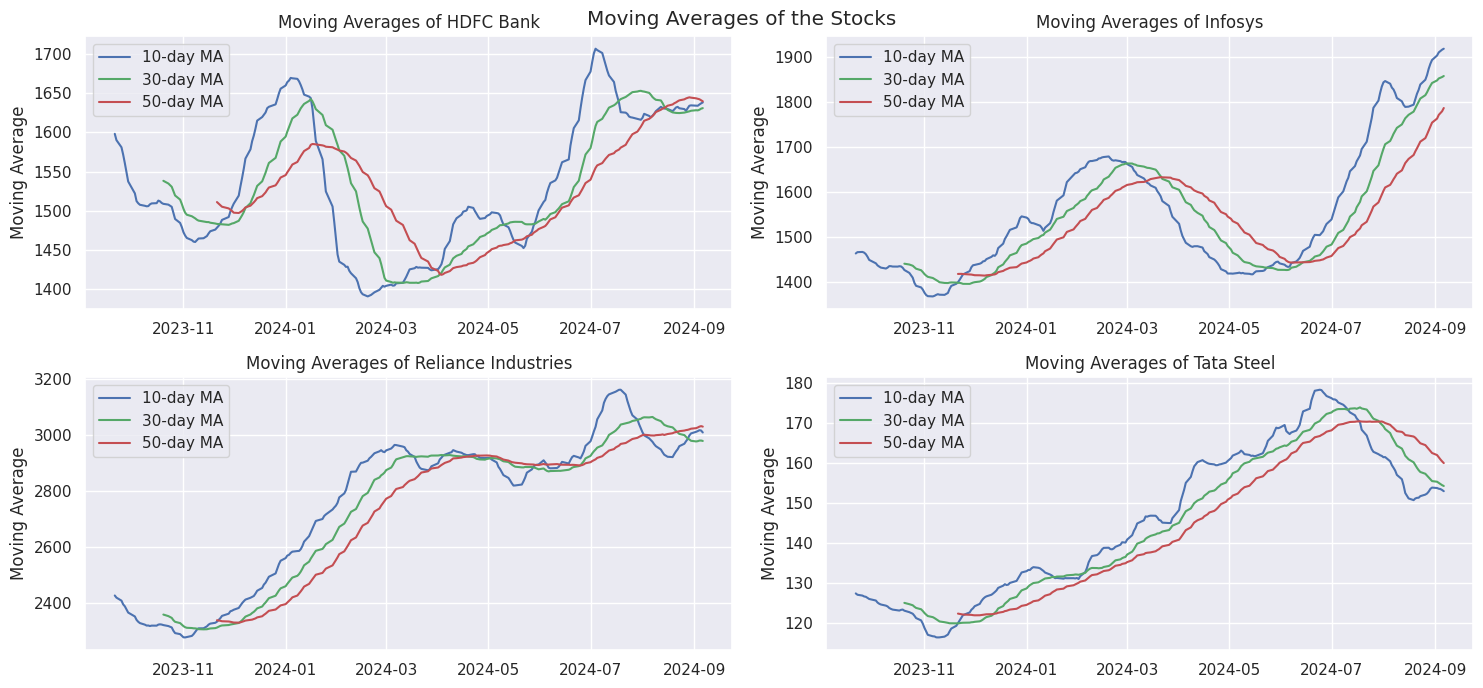

In [16]:
moving_averages = [10, 30, 50]
line_colors = ['b', 'g', 'r']

# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    for ma, color in zip(moving_averages, line_colors):
        ma_col = f"MA for {ma} days"

        if "Close" in stock_df.columns:
            stock_df[ma_col] = stock_df["Close"].rolling(ma).mean()
            sns.lineplot(
                x=stock_df.index,
                y=stock_df[ma_col],
                data=stock_df,
                ax=ax,
                label=f"{ma}-day MA",
                color=color,
            )
        else:
            print(f"Closing price data not found for {company_name}")

    ax.set(
        title=f"Moving Averages of {company_name}",
        xlabel=None,
        ylabel="Moving Average",
    )

for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.suptitle("Moving Averages of the Stocks")
plt.legend()
plt.show()


### 2.5 Daily Return

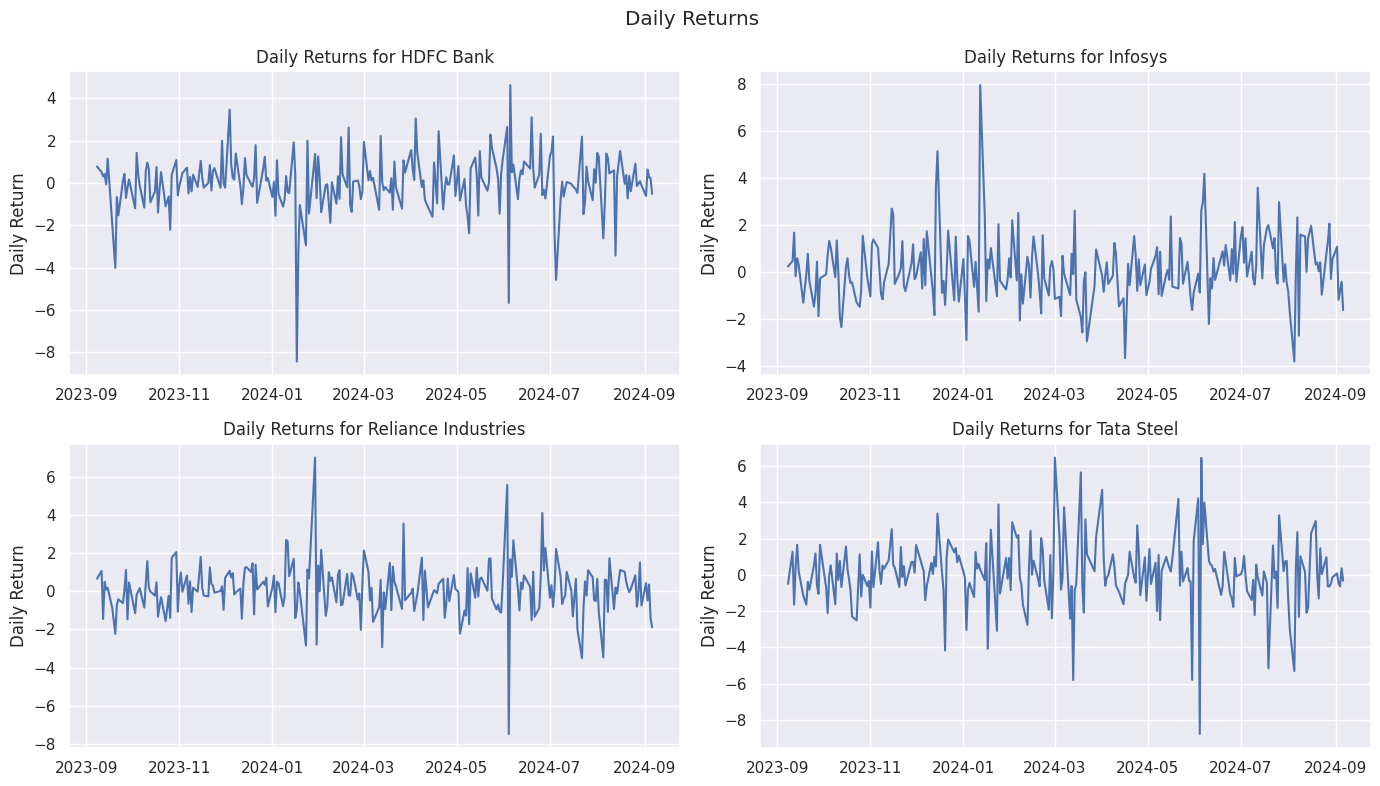

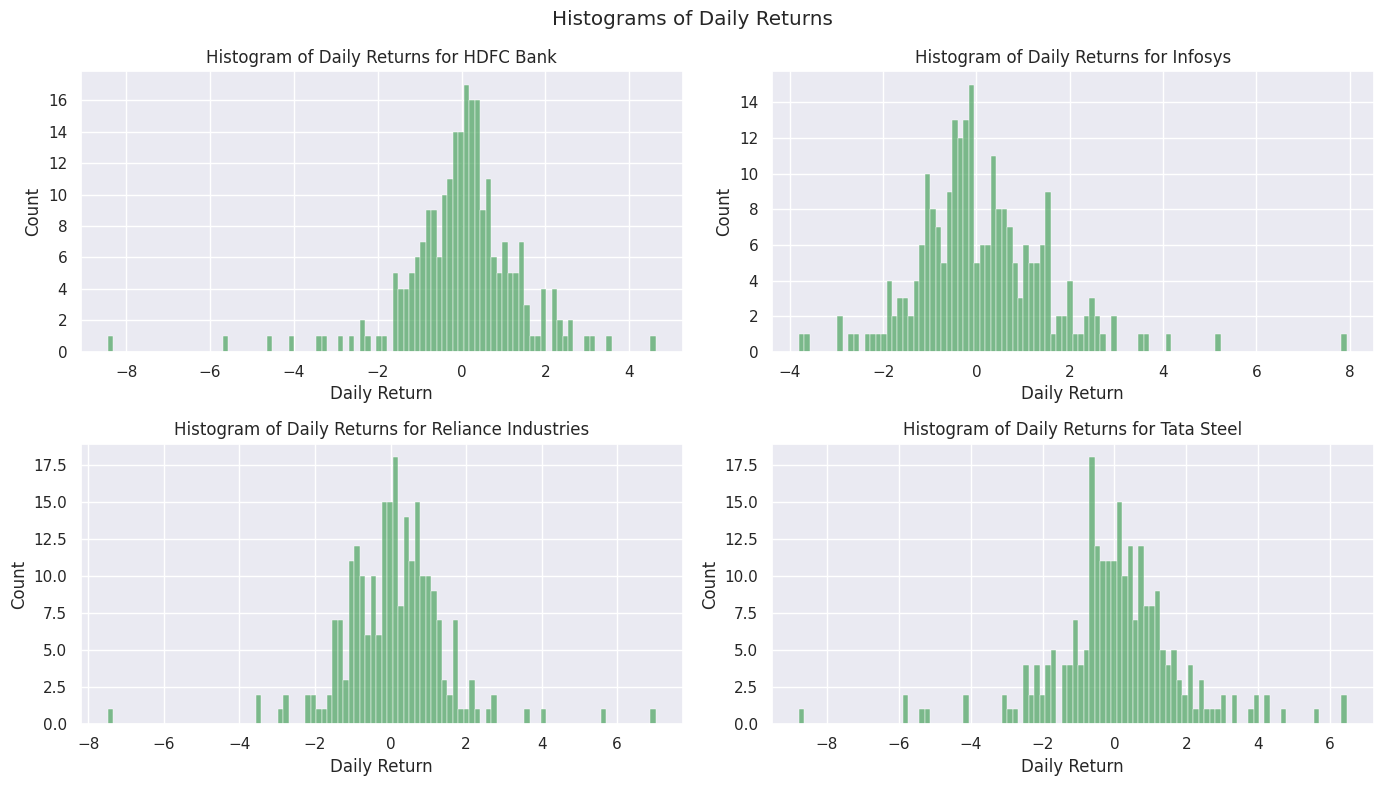

In [17]:
for stock_df in stock_dfs:
    stock_df["Daily Return"] = stock_df["Close"].pct_change() * 100  # Calculate daily returns in percentage

# subplots
plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        x=stock_df.index,
        y="Daily Return",
        data=stock_df,
        color='b',
    )
    plt.title(f"Daily Returns for {company_names[i-1]}")
    plt.xlabel(None)
    plt.ylabel("Daily Return")

plt.suptitle("Daily Returns")
plt.tight_layout()

plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        stock_df["Daily Return"].dropna(),
        bins=100,
        color='g',
    )
    plt.title(f"Histogram of Daily Returns for {company_names[i-1]}")

plt.suptitle("Histograms of Daily Returns")
plt.tight_layout()

plt.show()


### 2.6 Correlation between different stocks & closing prices

In [18]:
closing_df = data.pivot(columns='Company', values='Close')

print(closing_df.head())


Company                    HDFCBANK.NS      INFY.NS  RELIANCE.NS  TATASTEEL.NS
Date                                                                          
2023-09-07 00:00:00+05:30  1589.149414  1439.352417  2423.773682    127.579552
2023-09-08 00:00:00+05:30  1601.530396  1442.690186  2439.918945    126.942398
2023-09-11 00:00:00+05:30  1609.817261  1449.414795  2466.229736    128.559799
2023-09-12 00:00:00+05:30  1614.848511  1473.613403  2430.600586    126.452271
2023-09-13 00:00:00+05:30  1621.754272  1470.913818  2442.759277    126.991417


In [19]:
pct_closing = closing_df.pct_change()
pct_closing

Company,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TATASTEEL.NS
Date,,,,
2023-09-07 00:00:00+05:30,NaN,NaN,NaN,NaN
2023-09-08 00:00:00+05:30,0.007791,0.002319,0.006661,-0.004994
2023-09-11 00:00:00+05:30,0.005174,0.004661,0.010783,0.012741
2023-09-12 00:00:00+05:30,0.003125,0.016695,-0.014447,-0.016393
2023-09-13 00:00:00+05:30,0.004276,-0.001832,0.005002,0.004264
...,...,...,...,...
2024-09-02 00:00:00+05:30,-0.006079,0.010701,0.004389,0.000786
2024-09-03 00:00:00+05:30,0.006392,-0.011835,-0.004699,-0.004775
2024-09-04 00:00:00+05:30,0.002718,0.000000,0.003595,-0.006375


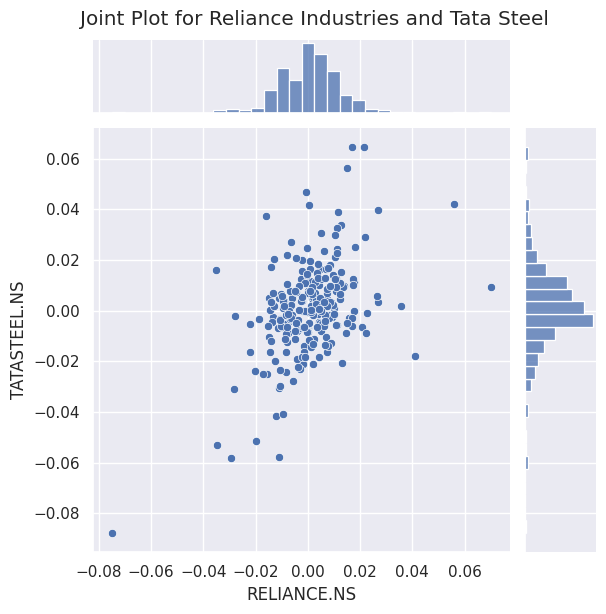

In [20]:

sns.jointplot(x=pct_closing["RELIANCE.NS"], y=pct_closing["TATASTEEL.NS"])


plt.suptitle("Joint Plot for Reliance Industries and Tata Steel", y=1.02)


plt.show()


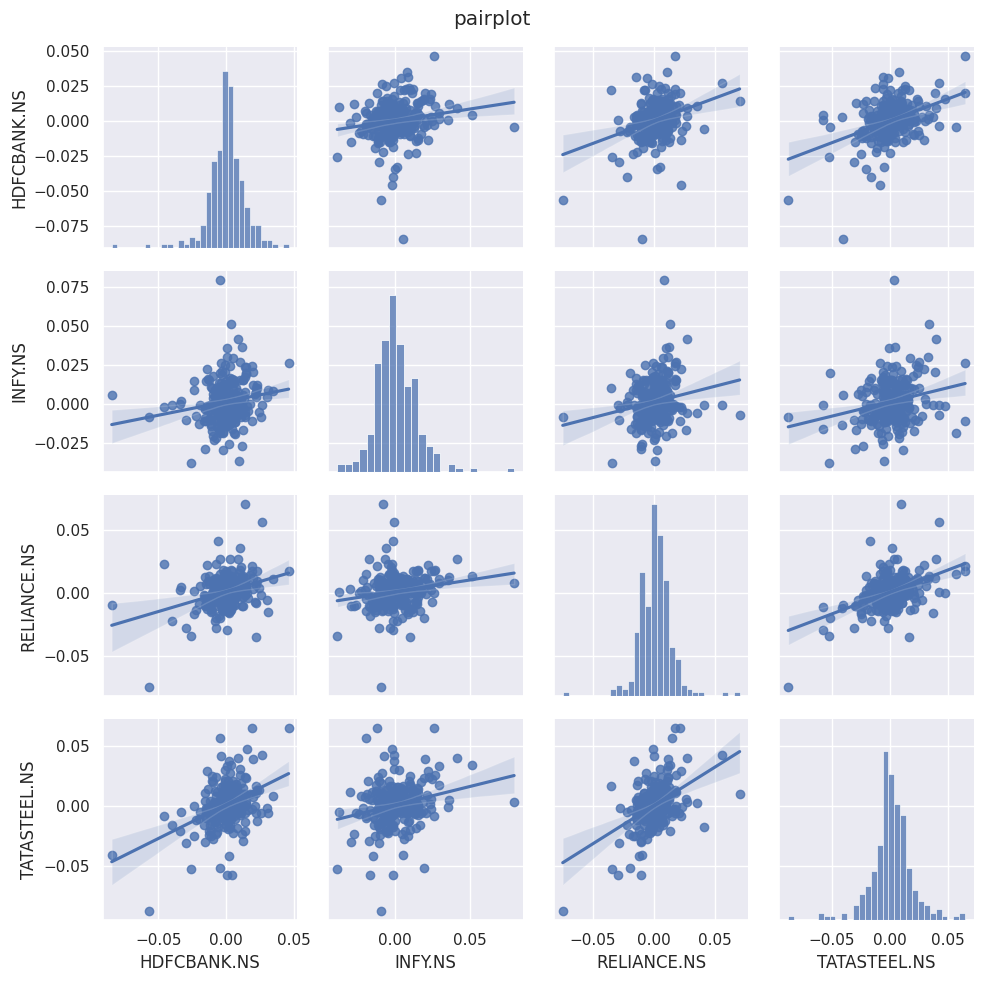

In [21]:
sns.pairplot(pct_closing, kind = "reg")
plt.suptitle("pairplot")
plt.tight_layout()

<Axes: xlabel='Company', ylabel='Company'>

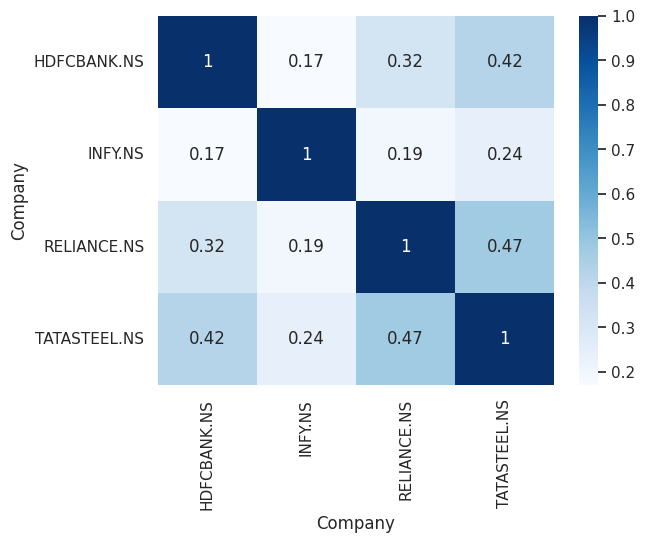

In [22]:
sns.heatmap(pct_closing.corr(), annot=  True, cmap = "Blues")

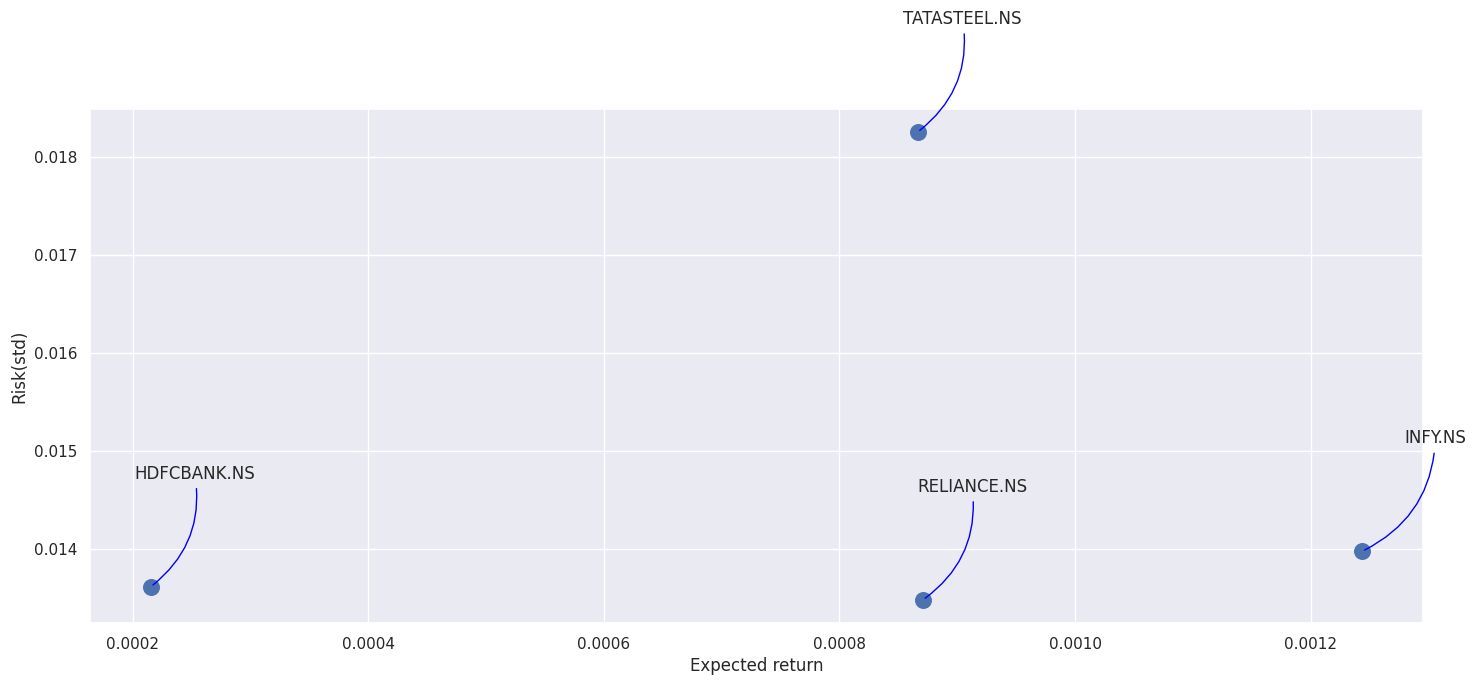

In [23]:
pct_closing = pct_closing.dropna()
area = np.pi * 40

plt.figure(figsize = (15, 7))
plt.scatter(pct_closing.mean(), pct_closing.std(), s = area)
plt.xlabel("Expected return")
plt.ylabel("Risk(std)")

for label, x, y in zip(
    pct_closing.columns,
    pct_closing.mean(),
    pct_closing.std()
):
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (75, 75),
        textcoords = "offset points",
        ha = "right",
        va = "bottom",
        arrowprops = dict(
            arrowstyle = '-',
            color = 'blue',
            connectionstyle = 'arc3,rad = -0.3'
        )
    )

plt.tight_layout()

# 3. PREDICTING STOCK PRICE


### 3.1 here using RELIANCE.NS as a test case

In [25]:

stock_symbol = 'RELIANCE.NS'
start_date = '2023-09-07'
end_date = datetime.now()

df = yf.download(stock_symbol, start=start_date, end=end_date)

print(df)


[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-09-07  2421.699951  2438.250000  2411.000000  2432.000000  2423.773682   
2023-09-08  2440.000000  2456.000000  2422.949951  2448.199951  2439.918945   
2023-09-11  2452.000000  2476.850098  2452.000000  2474.600098  2466.229736   
2023-09-12  2483.000000  2483.000000  2435.949951  2438.850098  2430.600586   
2023-09-13  2440.000000  2462.649902  2426.250000  2451.050049  2442.759277   
...                 ...          ...          ...          ...          ...   
2024-09-02  3021.750000  3053.600098  3013.250000  3032.500000  3032.500000   
2024-09-03  3042.500000  3046.000000  3015.000000  3018.250000  3018.250000   
2024-09-04  3001.399902  3035.000000  2999.000000  3029.100098  3029.100098   
2024-09-05  3038.100098  3051.550049  2974.100098  2985.949951  2985.949951   
2024-09-06  2985.000000  2994.000000  2923.250000  2

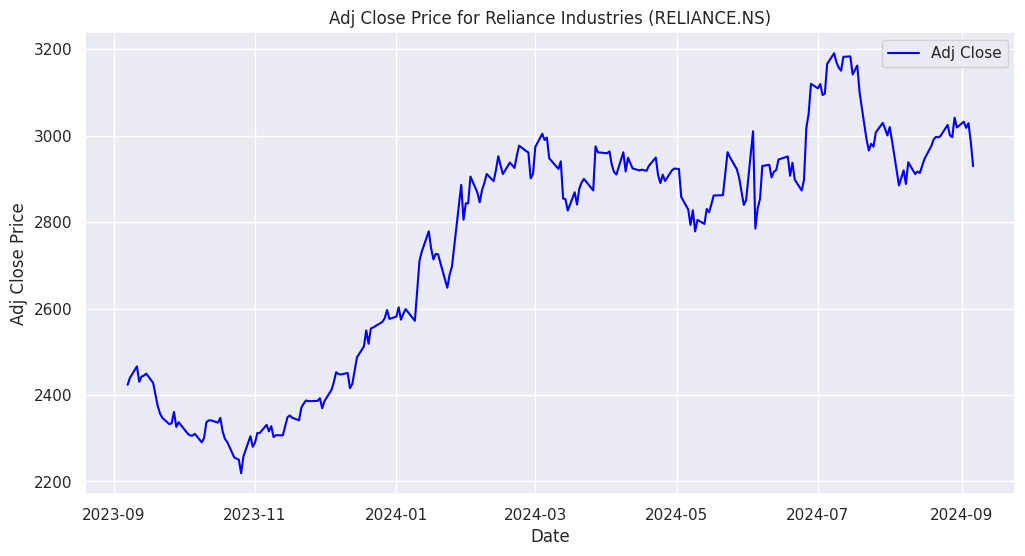

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.title('Adj Close Price for Reliance Industries (RELIANCE.NS)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)

plt.show()

In [27]:
data = df.filter(["Close"])
dataset = data.values

training_data_len = int(
    np.ceil(len(dataset)* 0.95)
)
training_data_len

232

### LSTM is sensitive to scale - use MinMax Scaler for optimization

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[0.21070439],
       [0.22731461],
       [0.25438335],
       [0.21772797],
       [0.23023689],
       [0.23254387],
       [0.23720915],
       [0.21526704],
       [0.15959181],
       [0.14180257],
       [0.13170301],
       [0.11683579],
       [0.11893776],
       [0.14600625],
       [0.11032512],
       [0.12150107],
       [0.09397098],
       [0.08986968],
       [0.08981861],
       [0.09381728],
       [0.0735671 ],
       [0.08397406],
       [0.12155239],
       [0.1260124 ],
       [0.12591002],
       [0.12052706],
       [0.13201066],
       [0.09996924],
       [0.08166708],
       [0.07443873],
       [0.0376294 ],
       [0.03224644],
       [0.        ],
       [0.04029534],
       [0.08817799],
       [0.06295488],
       [0.07269548],
       [0.09607295],
       [0.09556029],
       [0.11534912],
       [0.09976422],
       [0.11217051],
       [0.08617866],
       [0.09063867],
       [0.09033128],
       [0.133241  ],
       [0.13759863],
       [0.132

In [29]:
train_data = scaled_data[0: int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
"""    if i <= 61:
        print(x_train)
        print(y_train)
        print()"""

print(x_train[0])
print(y_train[0])

[0.21070439 0.22731461 0.25438335 0.21772797 0.23023689 0.23254387
 0.23720915 0.21526704 0.15959181 0.14180257 0.13170301 0.11683579
 0.11893776 0.14600625 0.11032512 0.12150107 0.09397098 0.08986968
 0.08981861 0.09381728 0.0735671  0.08397406 0.12155239 0.1260124
 0.12591002 0.12052706 0.13201066 0.09996924 0.08166708 0.07443873
 0.0376294  0.03224644 0.         0.04029534 0.08817799 0.06295488
 0.07269548 0.09607295 0.09556029 0.11534912 0.09976422 0.11217051
 0.08617866 0.09063867 0.09033128 0.133241   0.13759863 0.1323183
 0.12596134 0.1562595  0.16579508 0.17328001 0.17163939 0.17215205
 0.17861165 0.15477283 0.17204967 0.1986055  0.21660001 0.24054146]
0.23638884167507568


In [30]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(172, 60, 1)

### **Creating the Stacked LSTM**

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

model = Sequential()

# First LSTM layer with 16 units
model.add(LSTM(16, input_shape=(x_train.shape[1], 1), return_sequences=True))

# Second LSTM layer with 16 units and swish activation
model.add(LSTM(16, return_sequences=True, activation='swish'))

# Third LSTM layer with 16 units, no return sequences and swish activation
model.add(LSTM(16, return_sequences=False, activation='swish'))

# Output layer with swish activation
model.add(Dense(1, activation='swish'))

model.compile(optimizer="adam", loss="mean_squared_error")

# Fit the model to the data
model.fit(x_train, y_train, batch_size=50, epochs=52)


Epoch 1/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.4911
Epoch 2/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.4646
Epoch 3/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.4466
Epoch 4/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.4362
Epoch 5/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.4279
Epoch 6/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.3905
Epoch 7/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.3653
Epoch 8/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2919
Epoch 9/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.7906
Epoch 10/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1672
Epoch 11/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2347
Epoch 12/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2608
Epoch 13/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2647
Epoch 14/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2819
Epoch 15/52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2772
Epoch 16/52
4/4 ━━━━━━━━━━━━

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 16)              │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 16)              │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,181 (63.21 KB)

 Trainable params: 5,393 (21.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,788 (42.14 KB)

In [33]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [34]:
print(x_test[0])
print(y_test[0])

[0.7238798  0.70327065 0.67163951 0.6389828  0.65036401 0.81426214
 0.58243619 0.63057518 0.65282469 0.7314671  0.7344407  0.70424491
 0.71788154 0.72182914 0.74705225 0.75417821 0.7082949  0.73915705
 0.69916935 0.67307487 0.69906697 0.8218497  0.85573675 0.92720189
 0.91643597 0.92674054 0.90059474 0.90387574 0.97482821 1.
 0.97821183 0.96580529 0.95847432 0.99143843 0.99246376 0.9494514
 0.97082954 0.90618272 0.79447356 0.76827644 0.78427137 0.77750437
 0.81159644 0.8343073  0.82005538 0.80421415 0.82446433 0.79170498
 0.68507113 0.70296326 0.72095752 0.6887624  0.74038764 0.71234488
 0.71849684 0.71485688 0.74838497 0.76930176 0.78478403 0.79037225]
[2996.25]


In [35]:
x_test = np.array(x_test)
x_test = np.reshape(
    x_test,
    (x_test.shape[0], x_test.shape[1],1)
)

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

rmse = np.sqrt(np.mean((pred - y_test)**2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


In [36]:
rmse

70.28197276939716

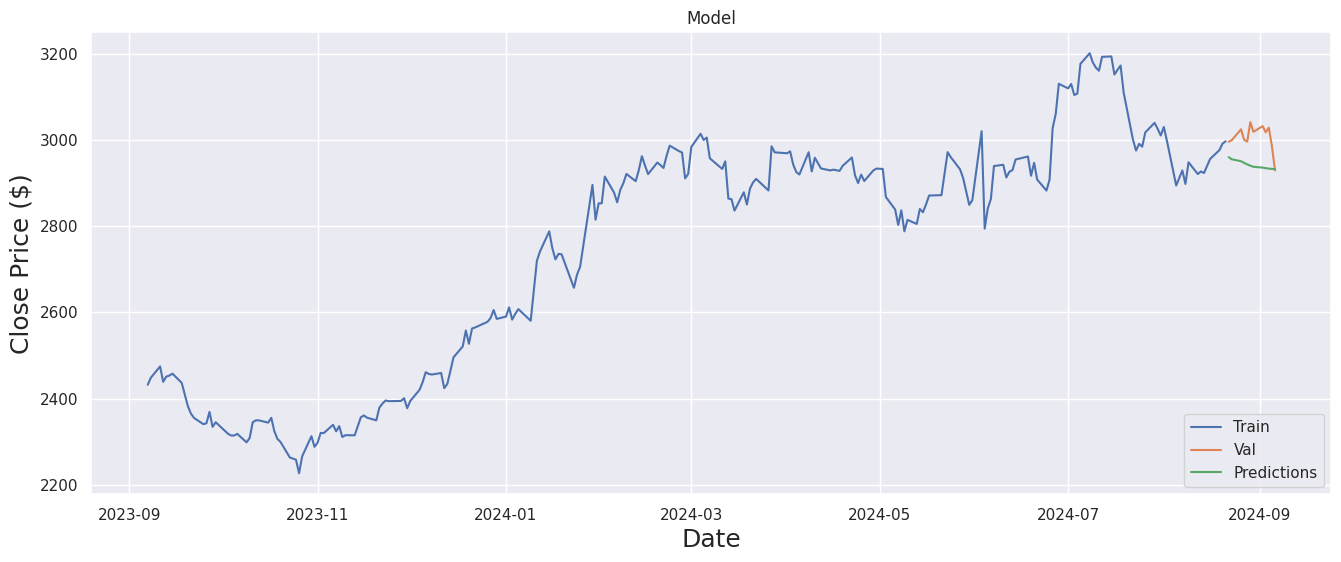

In [37]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = pred

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price ($)', fontsize = 18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

Epoch 1/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step - loss: 0.0174 - val_loss: 0.0297
Epoch 2/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0160 - val_loss: 0.0279
Epoch 3/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0152 - val_loss: 0.0270
Epoch 4/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0123 - val_loss: 0.0268
Epoch 5/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0125 - val_loss: 0.0273
Epoch 6/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0117 - val_loss: 0.0281
Epoch 7/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0115 - val_loss: 0.0292
Epoch 8/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0106 - val_loss: 0.0303
Epoch 9/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0094 - val_loss: 0.0313
Epoch 10/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0105 - val_loss: 0.0322
Epoch 11/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0114 - val_loss: 0.0328
Epoch 12/52
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0109 - val_loss: 0.033

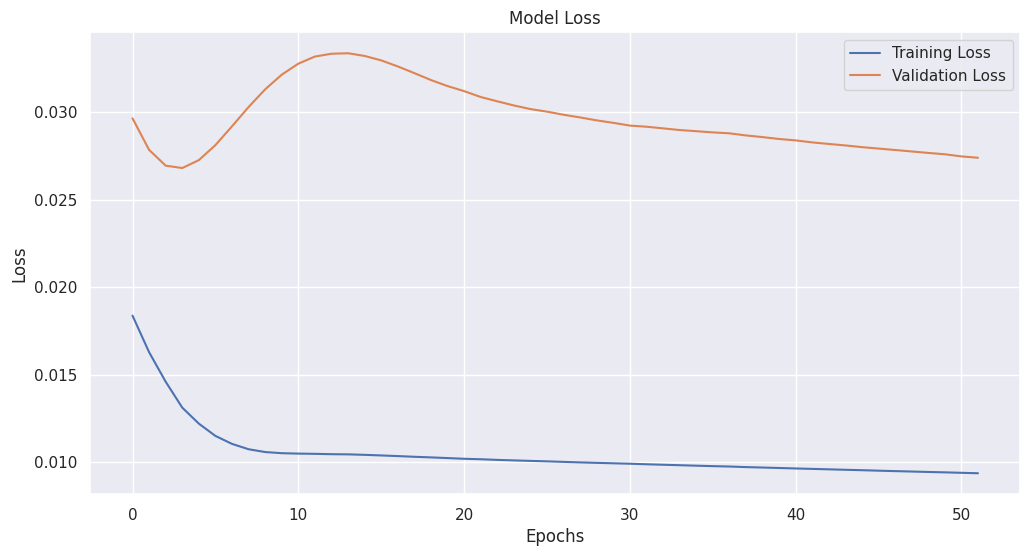

In [38]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size=50, epochs=52, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# It's a regression problem, typically we don't have an accuracy metric.
